<a href="https://colab.research.google.com/github/Dev-Atom42/MachineLearning-Calobaratory/blob/main/itsisi/3lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача: Управление системой отопления и вентиляции в офисном здании
Суть задачи: Система должна поддерживать комфортные условия в офисе, регулируя как
температуру, так и уровень вентиляции в зависимости от температуры снаружи, количества людей
в офисе и влажности воздуха. Система должна реагировать на изменения этих параметров и
автоматически адаптировать свою работу.  
**Условия:**
1. Если температура снаружи высокая и в офисе много людей, нужно увеличивать вентиляцию
и снижать нагрев.
2. Если в офисе мало людей, система может экономить энергию, снижая мощность нагрева
или вентиляции.
3. Если влажность воздуха слишком высокая или низкая, нужно изменять вентиляцию для
поддержания комфортного уровня влажности.  
**Входные переменные:**
1. Температура снаружи (outside temperature):
• Очень холодно (Very Cold)
• Холодно (Cold)
• Комфортно (Comfortable)
• Жарко (Hot)
• Очень жарко (Very Hot)
2. Количество людей в офисе (occupancy):
• Мало (Few)
• Нормально (Normal)
• Много (Many)
• Переполнено (Full)
3. Влажность воздуха (humidity):
• Очень низкая (Very Low)
• Низкая (Low)
• Нормальная (Normal)
• Высокая (High)
• Очень высокая (Very High)  
**Выходные переменные:**
1. Температура в помещении (room temperature):
• Очень холодная (Very Cold)
• Холодная (Cold)
• Комфортная (Comfortable)
• Теплая (Warm)
• Жаркая (Hot)
2. Скорость вентиляции (ventilation speed):
• Очень низкая (Very Low)
• Низкая (Low)
• Средняя (Medium)
• Высокая (High)
• Очень высокая (Very High)  
**Пример правил:**
1. Если температура снаружи очень холодная и мало людей, то температура в помещении
должна быть теплой, а вентиляция низкой.
2. Если температура снаружи жаркая и в офисе много людей, то температура в помещении
должна быть холодной, а вентиляция высокой.
3. Если влажность воздуха высокая и в офисе переполнено, то вентиляция должна быть очень
высокой.
4. Если температура снаружи комфортная, людей в офисе немного и влажность нормальная, то
температура в помещении должна оставаться комфортной, а вентиляция — на низком
уровне.
5. Если температура снаружи очень жаркая и влажность воздуха очень низкая, то вентиляция
и температура должны быть настроены на средний уровень для поддержания комфорта


In [38]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [39]:
# 1. Определяем входные и выходные переменные
outside_temperature = ctrl.Antecedent(np.arange(0, 41, 1), "Температура снаружи")
occupancy = ctrl.Antecedent(np.arange(0, 101, 1), "Количество людей в офисе")
humidity = ctrl.Antecedent(np.arange(0, 101, 1), "Влажность воздуха")
room_temperature = ctrl.Consequent(np.arange(0, 36, 1), "Температура в помещении")
ventilation_speed = ctrl.Consequent(np.arange(0, 101, 1), "Скорость вентиляции")

In [40]:
# 2. Определение функций принадлежности входных переменных
outside_temperature['Очень холодно'] = fuz.trimf(outside_temperature.universe, [0, 0, 20])
outside_temperature['Холодно'] = fuz.trapmf(outside_temperature.universe, [10, 20, 30, 40])
outside_temperature['Комфортно'] = fuz.gaussmf(outside_temperature.universe, mean=50, sigma=10)
outside_temperature['Жарко'] = fuz.trapmf(outside_temperature.universe, [60, 70, 80, 90])
outside_temperature['Очень жарко'] = fuz.trimf(outside_temperature.universe, [80, 100, 100])

occupancy['Мало'] = fuz.trimf(occupancy.universe, [0, 0, 20])
occupancy['Нормально'] = fuz.trapmf(occupancy.universe, [10, 20, 30, 40])
occupancy['Много'] = fuz.gaussmf(occupancy.universe, mean=50, sigma=10)
occupancy['Переполнено'] = fuz.trimf(occupancy.universe, [80, 100, 100])

humidity['Очень низкая'] = fuz.trimf(humidity.universe, [0, 0, 20])
humidity['Низкая'] = fuz.trapmf(humidity.universe, [10, 20, 30, 40])
humidity['Нормальная'] = fuz.gaussmf(humidity.universe, mean=50, sigma=10)
humidity['Высокая'] = fuz.trapmf(humidity.universe, [60, 70, 80, 90])
humidity['Очень высокая'] = fuz.trimf(humidity.universe, [80, 100, 100])

In [41]:
# 3. Определение функций принадлежности выходных переменных
room_temperature['Очень холодная'] = fuz.trimf(room_temperature.universe, [0, 0, 20])
room_temperature['Холодная'] = fuz.trapmf(room_temperature.universe, [10, 20, 30, 40])
room_temperature['Комфортная'] = fuz.gaussmf(room_temperature.universe, mean=50, sigma=10)
room_temperature['Теплая'] = fuz.trapmf(room_temperature.universe, [60, 70, 80, 90])
room_temperature['Жаркая'] = fuz.trimf(room_temperature.universe, [80, 100, 100])

ventilation_speed['Очень низкая'] = fuz.trimf(ventilation_speed.universe, [0, 0, 20])
ventilation_speed['Низкая'] = fuz.trapmf(ventilation_speed.universe, [10, 20, 30, 40])
ventilation_speed['Средняя'] = fuz.gaussmf(ventilation_speed.universe, mean=50, sigma=10)
ventilation_speed['Высокая'] = fuz.trapmf(ventilation_speed.universe, [60, 70, 80, 90])
ventilation_speed['Очень высокая'] = fuz.trimf(ventilation_speed.universe, [80, 100, 100])

In [42]:
# 4. Правила вывода решения
rule1 = ctrl.Rule(outside_temperature['Очень холодно'] & occupancy['Мало'], room_temperature['Очень холодная'])
rule1_ventilation = ctrl.Rule(outside_temperature['Очень холодно'] & occupancy['Мало'], ventilation_speed['Очень низкая'])

rule2 = ctrl.Rule(outside_temperature['Холодно'] & occupancy['Нормально'], room_temperature['Холодная'])
rule2_ventilation = ctrl.Rule(outside_temperature['Холодно'] & occupancy['Нормально'], ventilation_speed['Низкая'])

rule3 = ctrl.Rule(outside_temperature['Комфортно'] & occupancy['Много'], room_temperature['Комфортная'])
rule3_ventilation = ctrl.Rule(outside_temperature['Комфортно'] & occupancy['Много'], ventilation_speed['Средняя'])

rule4 = ctrl.Rule(outside_temperature['Жарко'] & occupancy['Переполнено'], room_temperature['Теплая'])
rule4_ventilation = ctrl.Rule(outside_temperature['Жарко'] & occupancy['Переполнено'], ventilation_speed['Высокая'])

# Остальные правила для влажности
rule5 = ctrl.Rule(humidity['Очень низкая'], ventilation_speed['Очень высокая'])
rule6 = ctrl.Rule(humidity['Низкая'], ventilation_speed['Высокая'])
rule7 = ctrl.Rule(humidity['Нормальная'], ventilation_speed['Средняя'])
rule8 = ctrl.Rule(humidity['Высокая'], ventilation_speed['Низкая'])
rule9 = ctrl.Rule(humidity['Очень высокая'], ventilation_speed['Очень низкая'])

In [43]:
# 5. Система нечеткого управления
heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
heating = ctrl.ControlSystemSimulation(heating_ctrl)

In [48]:
# 6. Подаем на вход конкретные значения
heating.input['Температура снаружи'] = 40
heating.input['Количество людей в офисе'] = 100
heating.input['Влажность воздуха'] = 75

In [49]:
# 7. Вычисляем результат
heating.compute()

In [50]:
# 8. Выводим результат
print(f"Температура в помещении: {heating.output['Температура в помещении']:.2f}°C")
print(f"Скорость вентиляции: {heating.output['Скорость вентиляции']:.2f}%")

Температура в помещении: 17.50°C
Скорость вентиляции: 27.70%


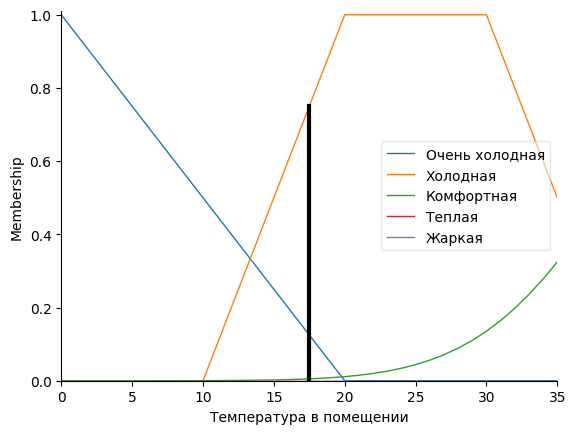

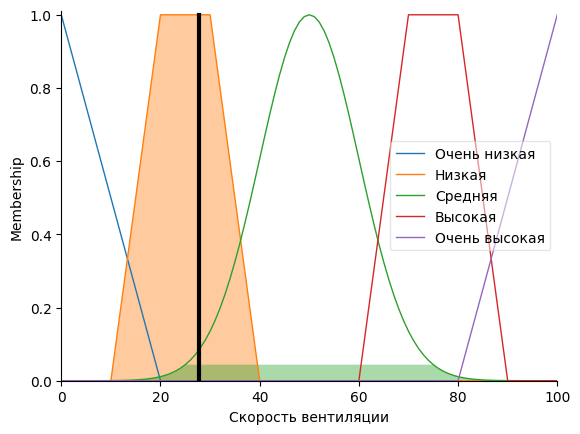

In [51]:
# 9. Визуализация результатов
room_temperature.view(sim=heating)
ventilation_speed.view(sim=heating)